In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score, precision_recall_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel,SelectKBest,SelectPercentile
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 


In [2]:
#loading data file
#dataset source:https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set
fullFileName='C:/Users/SARA/Desktop/D I C/9351/travail pratique 1/dataset/diabetic.csv'
data= pd.read_csv(fullFileName, sep=',', header=0)


In [3]:
df = data.drop('id', axis = 1)

In [4]:
print("Dataset shape:: ", df.shape)
print("Dataset Lenght:: ",len(df))
df.isnull().sum(axis=0)

Dataset shape::  (1151, 20)
Dataset Lenght::  1151


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
Class    0
dtype: int64

In [5]:
print("Dataset:: ")
df.head()
df.info()
df.describe()

Dataset:: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
0        1151 non-null int64
1        1151 non-null int64
2        1151 non-null int64
3        1151 non-null int64
4        1151 non-null int64
5        1151 non-null int64
6        1151 non-null int64
7        1151 non-null int64
8        1151 non-null float64
9        1151 non-null float64
10       1151 non-null float64
11       1151 non-null float64
12       1151 non-null float64
13       1151 non-null float64
14       1151 non-null float64
15       1151 non-null float64
16       1151 non-null float64
17       1151 non-null float64
18       1151 non-null int64
Class    1151 non-null int64
dtypes: float64(10), int64(10)
memory usage: 180.0 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


In [6]:
data_=df.values
X1 = data_[:,0:-1] 
Y = data_[:,-1]
 
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
X2 = min_max_scaler.fit_transform(X1) 

  
""" Standardisation """ 
Standardisation = preprocessing.StandardScaler() 
# Scaled feature 
X = Standardisation.fit_transform(X2) 

#Spliting Dataset into Test and Train
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=0)
#Applying Standard scaling to get optimized result

In [7]:
###remove constant,
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [8]:
##duplicate features
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T

In [9]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [10]:
X_train_T.duplicated().sum()

0

In [11]:
####we have duplicate features here
duplicated_features=X_train_T.duplicated()

In [12]:
features_to_keep=[not index for index in duplicated_features]

In [13]:
X_train_=X_train_T[features_to_keep].T
X_test_=X_test_T[features_to_keep].T

In [14]:
X_train_.shape,X_test_.shape

((920, 19), (231, 19))

In [15]:
#Decision Tree Classifier
#Function to perform training with Entropy
dt=DecisionTreeClassifier(criterion="entropy", random_state=0)
dt.fit(X_train_, y_train)
# Function to make prediction
y_pred_en=dt.predict(X_test_)
#checking performance of the model
print(confusion_matrix(y_test, y_pred_en))
print(classification_report(y_test, y_pred_en))
f1_score(y_test, y_pred_en, average='weighted')


[[60 41]
 [54 76]]
              precision    recall  f1-score   support

         0.0       0.53      0.59      0.56       101
         1.0       0.65      0.58      0.62       130

    accuracy                           0.59       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.60      0.59      0.59       231



0.5903553810530555

In [16]:
#Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100, max_features=.2)
rfc.fit(X_train_, y_train)
predictionRF=rfc.predict(X_test_)
#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))
f1_score(y_test, predictionRF,average='weighted')


[[72 29]
 [49 81]]
              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65       101
         1.0       0.74      0.62      0.68       130

    accuracy                           0.66       231
   macro avg       0.67      0.67      0.66       231
weighted avg       0.67      0.66      0.66       231



0.6634784134784134

In [17]:
#define K
import math
math.sqrt(len(y_test))

15.198684153570664

In [18]:
#K-NN classifier
knn=KNeighborsClassifier(n_neighbors=15, p=2, metric='euclidean')

#predict the test set results
knn.fit(X_train_, y_train)
predictionKNN=knn.predict(X_test_)
#Evaluate model
print(confusion_matrix(y_test, predictionKNN))
print(classification_report(y_test, predictionKNN))
f1_score(y_test, predictionKNN,average='weighted')

[[71 30]
 [57 73]]
              precision    recall  f1-score   support

         0.0       0.55      0.70      0.62       101
         1.0       0.71      0.56      0.63       130

    accuracy                           0.62       231
   macro avg       0.63      0.63      0.62       231
weighted avg       0.64      0.62      0.62       231



0.6237577854048046

In [19]:
# svm Classifier
clf=svm.SVC(kernel="rbf", C=1)
clf.fit(X_train_,y_train)
predictionSVM=clf.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionSVM))
print(classification_report(y_test, predictionSVM))
f1_score(y_test, predictionSVM,average='weighted')
#print(f'f1_score: {f1_score(y_test, predictionSVM,average='weighted', labels=np.unique(predictionSVM))}')

[[76 25]
 [53 77]]
              precision    recall  f1-score   support

         0.0       0.59      0.75      0.66       101
         1.0       0.75      0.59      0.66       130

    accuracy                           0.66       231
   macro avg       0.67      0.67      0.66       231
weighted avg       0.68      0.66      0.66       231



C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6625148464728674

In [20]:
#Bagging Classifier
bg=BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=10)
bg=BaggingClassifier()
bg.fit(X_train_,y_train)
predictionbg=bg.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionbg))
print(classification_report(y_test, predictionbg))
f1_score(y_test, predictionbg,average='weighted')

[[71 30]
 [52 78]]
              precision    recall  f1-score   support

         0.0       0.58      0.70      0.63       101
         1.0       0.72      0.60      0.66       130

    accuracy                           0.65       231
   macro avg       0.65      0.65      0.64       231
weighted avg       0.66      0.65      0.65       231



0.6460470551857107

In [21]:
#Boosting Classifier- Ada Boost
adb=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
adb.fit(X_train_,y_train)
predictionadb=adb.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionadb))
print(classification_report(y_test, predictionadb))
f1_score(y_test, predictionadb,average='weighted')

[[56 45]
 [54 76]]
              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53       101
         1.0       0.63      0.58      0.61       130

    accuracy                           0.57       231
   macro avg       0.57      0.57      0.57       231
weighted avg       0.58      0.57      0.57       231



0.5728851688708944

In [23]:
#Naive bayse Classifier
nb=GaussianNB()
nb.fit(X_train_,y_train)
predictionnb=nb.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionnb))
print(classification_report(y_test, predictionnb))
f1_score(y_test, predictionnb,average='weighted', labels=np.unique(predictionnb))

[[61 40]
 [51 79]]
              precision    recall  f1-score   support

         0.0       0.54      0.60      0.57       101
         1.0       0.66      0.61      0.63       130

    accuracy                           0.61       231
   macro avg       0.60      0.61      0.60       231
weighted avg       0.61      0.61      0.61       231



0.6075312774786725

In [24]:
#creat Multilayer neural network Classifier
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train_,y_train)
predictionNN=nn.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionNN))
print(classification_report(y_test, predictionNN))
f1_score(y_test, predictionNN,average='weighted', labels=np.unique(predictionNN))


[[87 14]
 [73 57]]
              precision    recall  f1-score   support

         0.0       0.54      0.86      0.67       101
         1.0       0.80      0.44      0.57       130

    accuracy                           0.62       231
   macro avg       0.67      0.65      0.62       231
weighted avg       0.69      0.62      0.61       231



0.6106695957442225

In [25]:
#Voting Classifier- Multiple Model Ensemble
evc=VotingClassifier(estimators=[('dt',dt),('rfc',rfc),('clf',clf),('knn',knn),('bg',bg),('adb',adb),('nb',nb),('nn',nn)], voting='hard')
evc.fit(X_train_,y_train)
predictionevc=evc.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionevc))
print(classification_report(y_test, predictionevc))
f1_score(y_test, predictionevc,average='weighted', labels=np.unique(predictionevc))

C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[79 22]
 [57 73]]
              precision    recall  f1-score   support

         0.0       0.58      0.78      0.67       101
         1.0       0.77      0.56      0.65       130

    accuracy                           0.66       231
   macro avg       0.67      0.67      0.66       231
weighted avg       0.69      0.66      0.66       231



0.6566618566618567

In [26]:
#defining learning classifiers
names=["Decision_Tree", "Random_Forest", "linear_SVM","Nearest_Neighbors","Bagging","AdaBoost","Naive_Bayes","Neural_Net","Vothing_classifier"]
classifiers = [dt,rfc,clf,knn,bg,adb,nb,nn,evc]

In [27]:
#Build Model, Apply Model on Test Data & Record Accuracy Scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_, y_train)
    prediction=clf.predict(X_test_)
    score=f1_score(y_test, prediction,average='weighted', labels=np.unique(prediction))
    scores.append(score)

C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
scores

[0.5903553810530555,
 0.6592286567878464,
 0.6625148464728674,
 0.6237577854048046,
 0.6375921375921375,
 0.6032889755254021,
 0.6075312774786725,
 0.6106695957442225,
 0.6601702351702352]

In [32]:
#create data frame of model performance
df = pd.DataFrame()
df['Machine Learning algorithms'] = names
df['F-measure of Diabetic'] = scores 
df

,Machine Learning algorithms,F-measure of Diabetic
0,Decision_Tree,0.590355
1,Random_Forest,0.659229
2,linear_SVM,0.662515
3,Nearest_Neighbors,0.623758
4,Bagging,0.637592
5,AdaBoost,0.603289
6,Naive_Bayes,0.607531
7,Neural_Net,0.610670
8,Vothing_classifier,0.660170


In [35]:
#adding colors to the data frame
cm = sns.light_palette("#007BA7", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Machine Learning algorithms,F-measure of Diabetic
0,Decision_Tree,0.590355
1,Random_Forest,0.659229
2,linear_SVM,0.662515
3,Nearest_Neighbors,0.623758
4,Bagging,0.637592
5,AdaBoost,0.603289
6,Naive_Bayes,0.607531
7,Neural_Net,0.61067
8,Vothing_classifier,0.66017


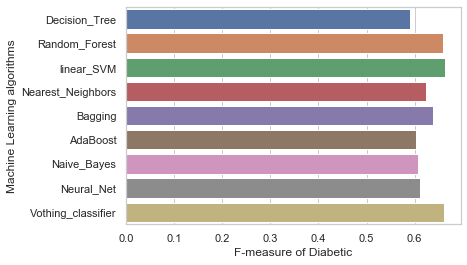

In [36]:
#Bar plot of model performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Machine Learning algorithms", x="F-measure of Diabetic", data=df)
